## Simple Fashion-MNIST Classifier

In [35]:
import tensorflow as tf
import tensorflow.keras as K
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Listing available GPUs

In [2]:
tf.config.list_physical_devices('GPU')

2022-11-27 00:41:59.491583: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-11-27 00:41:59.491620: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: HELL
2022-11-27 00:41:59.491626: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: HELL
2022-11-27 00:41:59.491744: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 520.56.6
2022-11-27 00:41:59.491760: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 520.56.6
2022-11-27 00:41:59.491764: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 520.56.6


[]

## Loading dataset

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

In [5]:
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [6]:
X_train.shape

(55000, 28, 28)

In [7]:
X_train.dtype

dtype('uint8')

In [8]:
# Data normalization
X_train, X_valid, X_test = X_train/255., X_valid/255., X_test/255. 

In [9]:
X_train.dtype

dtype('float64')

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

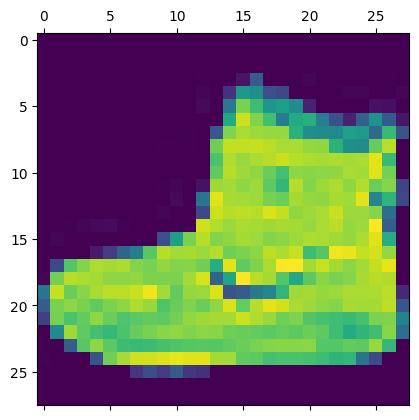

In [11]:
plt.matshow(X_train[0])

In [12]:
tf.random.set_seed(42)

## Building a model using sequential API

In [13]:
model = K.Sequential()

2022-11-27 00:42:00.131427: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
model

In [15]:
model.add(K.layers.Input(shape=[28, 28]))
model.add(K.layers.Flatten())
model.add(K.layers.Dense(300, activation='relu'))
model.add(K.layers.Dense(100, activation='relu'))
model.add(K.layers.Dense(10, activation='softmax'))

In [16]:
# Equivalently
#model=K.Sequential([K.layers.Flatten(input_shape=[28, 28]),
#                   K.layers.Dense(300, activation='relu'),
#                   K.layers.Dense(100, activation='relu'),
#                   K.layers.Dense(10, activation='softmax')
#                   ])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
K.activations.relu

<function keras.activations.relu(x, alpha=0.0, max_value=None, threshold=0.0)>

In [19]:
model.layers

## Accessing model layers

In [20]:
hidden = model.layers[1]

In [21]:
hidden.name

'dense'

## Comparison on model layers objects

In [22]:
model.get_layer('dense') == hidden

True

## Model parameters

In [23]:
weights, biases = hidden.get_weights()

In [24]:
weights

array([[ 0.02877878,  0.00972056, -0.05493736, ..., -0.03437289,
         0.0054151 , -0.04854435],
       [-0.01693369, -0.06329893,  0.02553378, ..., -0.01302826,
         0.0496726 ,  0.00664008],
       [-0.03680067, -0.03627734,  0.04211094, ..., -0.05599319,
        -0.03346603, -0.00545574],
       ...,
       [ 0.03736064,  0.0299435 , -0.05729245, ..., -0.00106885,
         0.03777389, -0.05375556],
       [-0.05251581,  0.06660017,  0.05951533, ..., -0.0425899 ,
         0.0193231 , -0.04133527],
       [ 0.05027477,  0.01981256, -0.05060957, ...,  0.00889314,
        -0.06602696, -0.01014229]], dtype=float32)

In [25]:
weights.shape

(784, 300)

In [26]:
biases.shape

(300,)

## Model compilation binding loss, optimized and metrics

In [27]:
model.compile(loss=K.losses.sparse_categorical_crossentropy,
             optimizer=K.optimizers.SGD(),
             metrics=[K.metrics.sparse_categorical_accuracy])

## One-hot encoding

In [28]:
K.utils.to_categorical([[6],[7]], 11)

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [29]:
K.utils.to_categorical([6, 7], 11)

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [30]:
np.argmax(K.utils.to_categorical([6,7], 11), axis=1)

array([6, 7])

## Training

In [38]:
history = model.fit(X_train, y_train, 
         epochs=30,
         validation_data=[X_valid, y_valid])

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3790 - sparse_categorical_accuracy: 0.8666 - val_loss: 0.3990 - val_sparse_categorical_accuracy: 0.8562
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3664 - sparse_categorical_accuracy: 0.8714 - val_loss: 0.3918 - val_sparse_categorical_accuracy: 0.8632
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3529 - sparse_categorical_accuracy: 0.8754 - val_loss: 0.3739 - val_sparse_categorical_accuracy: 0.8684
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3441 - sparse_categorical_accuracy: 0.8786 - val_loss: 0.3573 - val_sparse_categorical_accuracy: 0.8686
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3337 - sparse_categorical_accuracy: 0.8812 - val_loss: 0.3594 - val_sparse_categorical_accuracy: 0.8716
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3248 - spars

In [44]:
history.params['epochs']


30

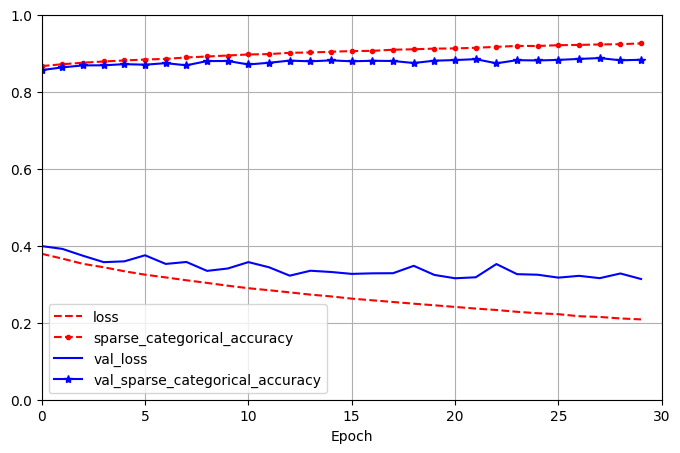

In [45]:
pd.DataFrame(history.history).plot(figsize=(8, 5),
                                  xlim=[0, history.params['epochs']],
                                  ylim=[0, 1],
                                  grid=True,
                                  xlabel='Epoch',
                                  style=["r--", "r--.", "b-", "b-*"])
plt.show()

## Model evaluation

In [46]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 847us/step - loss: 0.3209 - sparse_categorical_accuracy: 0.8879


[0.32093656063079834, 0.8878999948501587]

In [47]:
X_new=X_test[:3]

In [50]:
y_proba=model.predict(X_new)

1/1 [==============================] - 0s 59ms/step


In [51]:
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [52]:
y_pred=y_proba.argmax(axis=1)

In [53]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')